# Assignment 8: Trees
### Joe Leonard (ymd3tv) - DS 3001

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
- Decision trees are built through a recursive process that splits the data into increasingly pure subsets. At each step, the algorithm evaluates all possible splits across features and selects the one that maximizes homogeneity, typically using metrics like Gini impurity or variance reduction. This splitting continues until a stopping condition is met, such as reaching a maximum depth or having too few samples in a node. The final leaf nodes make predictions based on the majority class or average value of their samples. This method creates a hierarchical structure that partitions the feature space into distinct regions.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
- Trees naturally capture non-linear relationships by splitting the data along feature thresholds, creating piecewise constant predictions. Unlike linear models, which assume a straight-line relationship, trees can model complex interactions and discontinuities without requiring manual feature engineering. Linear models, on the other hand, rely on transformations to fit non-linear patterns, making them less flexible when the true relationship is highly irregular. Trees excel in scenarios where the data has abrupt changes or interactions between variables, whereas linear models struggle unless explicitly adjusted.

3. Why is the Gini a good loss function for categorical target variables? 
- The Gini impurity measures how often a randomly chosen sample would be misclassified if labeled based on the class distribution in a node. It is effective because it directly penalizes class overlap, encouraging splits that separate categories cleanly. Unlike entropy, which involves logarithms, Gini is computationally simpler while achieving similar results. By minimizing Gini impurity, trees prioritize splits that create the most homogeneous subgroups, improving classification accuracy. This makes it a practical and efficient criterion for decision tree learning.

4. Why do trees tend to overfit, and how can this tendency be constrained? 
- Trees overfit because they can grow excessively deep, creating overly complex structures that memorize noise in the training data. To prevent this, constraints like maximum depth, minimum samples per leaf, or pruning can be applied. Techniques such as random forests or gradient boosting also help by combining multiple trees to reduce variance. These methods balance flexibility and generalization, ensuring the model performs well on unseen data without sacrificing too much training accuracy.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
- While trees handle categorical variables naturally, they are also effective with continuous features by splitting at optimal thresholds. Their performance depends more on the underlying data structure than variable types—they excel when relationships are non-linear or involve interactions, regardless of whether features are categorical or numerical. Thus, the claim is misleading; trees are versatile and work well across diverse data types when properly tuned.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
- Binary splits are standard because they simplify decision-making, reduce computational complexity, and maintain interpretability. Multi-way splits can fragment data too quickly, leading to overfitting or unstable trees. Binary splits also generalize better, as they incrementally refine partitions rather than making abrupt divisions. While some algorithms support multi-way splits, binary trees dominate due to their balance of efficiency and performance.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
If a tree is too deep with many leaves containing few samples, it likely overfits the training data, performing well on training but poorly on validation. Conversely, a shallow tree with high error on both training and validation sets suggests underfitting. Comparing performance across datasets helps diagnose issues—large gaps indicate overfitting, while consistently poor performance suggests underfitting. Pruning or adjusting hyperparameters can then refine the model’s fit.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

cars = pd.read_csv('./data/cars_hw.csv')

print(cars.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [4]:
# Select features and target
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'

# One-hot encode categorical variables
X_cat = pd.get_dummies(cars[categorical_vars], drop_first=True)
X_num = cars[numeric_vars]
X = pd.concat([X_num, X_cat], axis=1)
y = cars[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (780, 45), Test set: (196, 45)


3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

Best R2 (0.825) at min_samples_leaf = 5


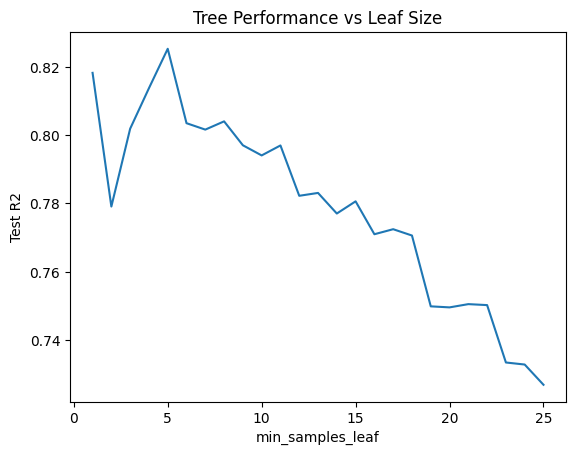

In [5]:
# Find optimal min_samples_leaf
r2_scores = []
for msl in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=msl, random_state=42)
    model.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, model.predict(X_test)))

optimal_msl = np.argmax(r2_scores) + 1  # +1 because range starts at 1
print(f"Best R2 ({max(r2_scores):.3f}) at min_samples_leaf = {optimal_msl}")

# Plot R2 vs min_samples_leaf
plt.plot(range(1, 26), r2_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('Test R2')
plt.title('Tree Performance vs Leaf Size')
plt.show()

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

Tree R2: 0.825, RMSE: 141536.54


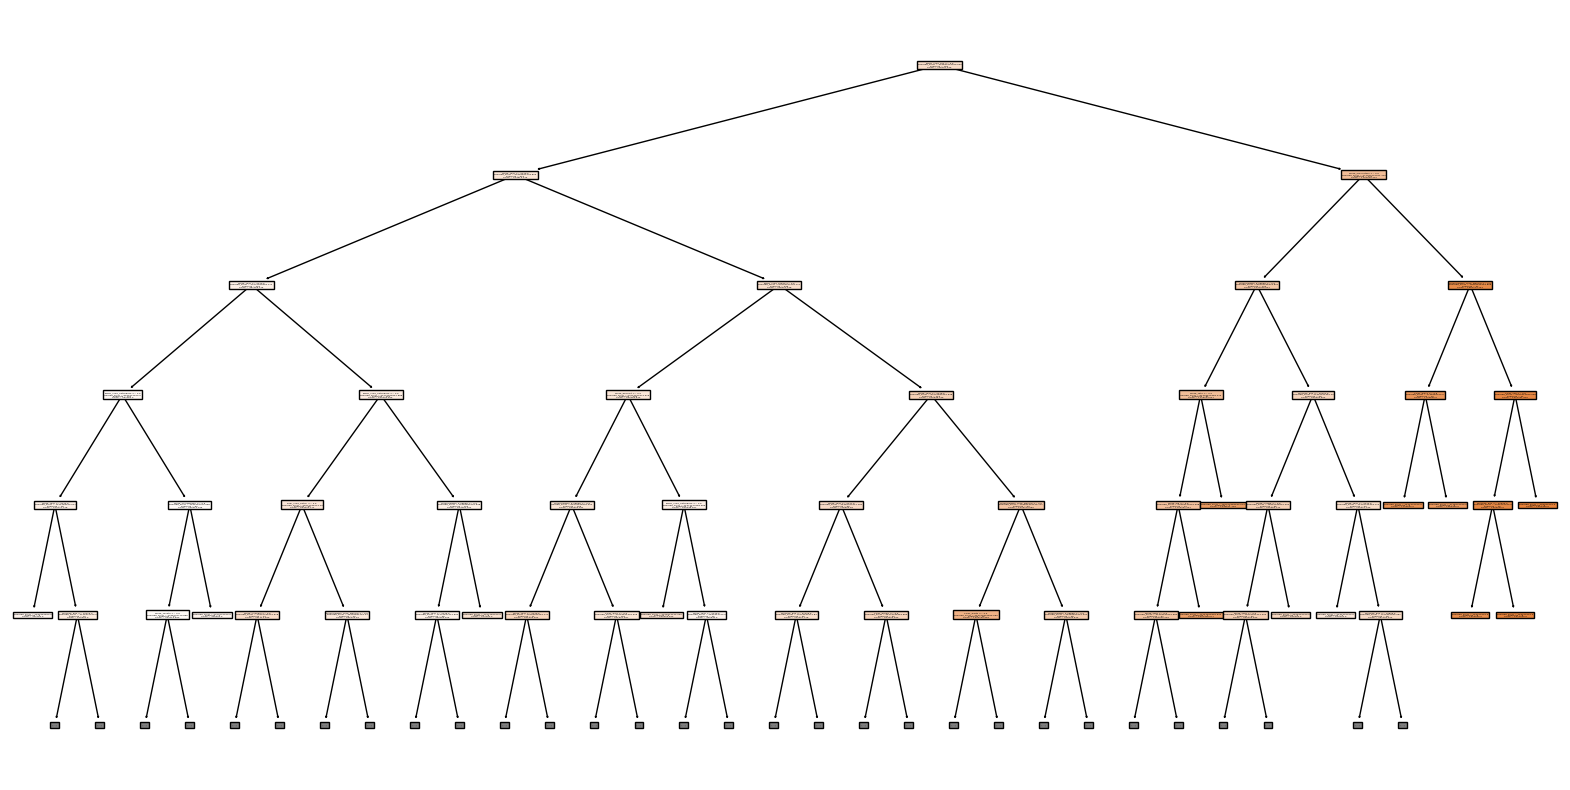

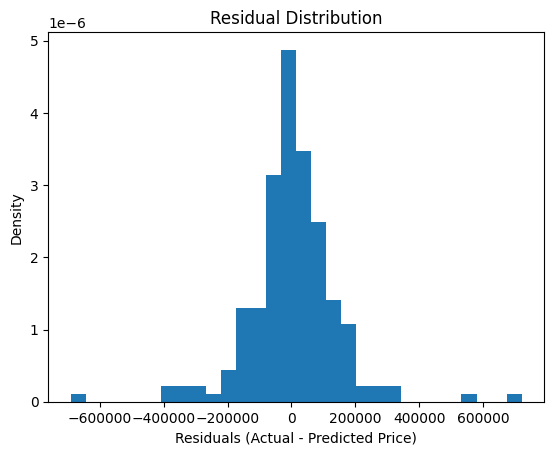

In [8]:
# Train and evaluate optimal tree
tree = DecisionTreeRegressor(min_samples_leaf=optimal_msl, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_r2 = r2_score(y_test, y_pred_tree)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Tree R2: {tree_r2:.3f}, RMSE: {tree_rmse:.2f}")

# Plot tree (first 5 levels for readability)
plt.figure(figsize=(20, 10))
plot_tree(tree, max_depth=5, feature_names=X.columns, filled=True)
plt.show()

# Plot residuals
residuals = y_test - y_pred_tree
plt.hist(residuals, bins=30, density=True)
plt.xlabel('Residuals (Actual - Predicted Price)')
plt.ylabel('Density')
plt.title('Residual Distribution')
plt.show()

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?


In [9]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R2: {lr_r2:.3f}, RMSE: {lr_rmse:.2f}")
print(f"Best model: {'Tree' if tree_r2 > lr_r2 else 'Linear Regression'}")

Linear Regression R2: 0.820, RMSE: 143575.20
Best model: Tree


6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

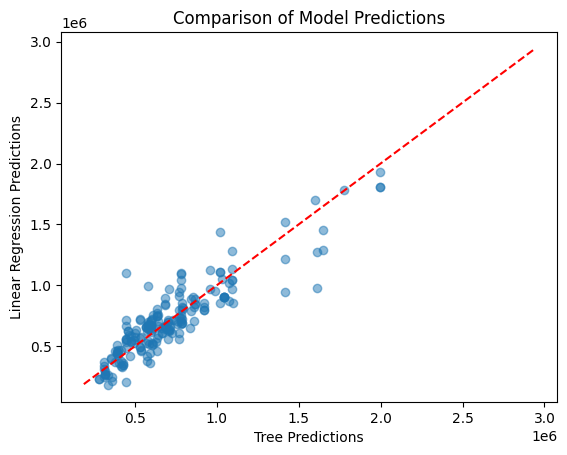

In [10]:
# Scatter plot of predictions
plt.scatter(y_pred_tree, y_pred_lr, alpha=0.5)
plt.xlabel('Tree Predictions')
plt.ylabel('Linear Regression Predictions')
plt.title('Comparison of Model Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal reference
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load data
ratings = pd.read_csv('./data/corporate_ratings.csv')

print(ratings.head())

  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

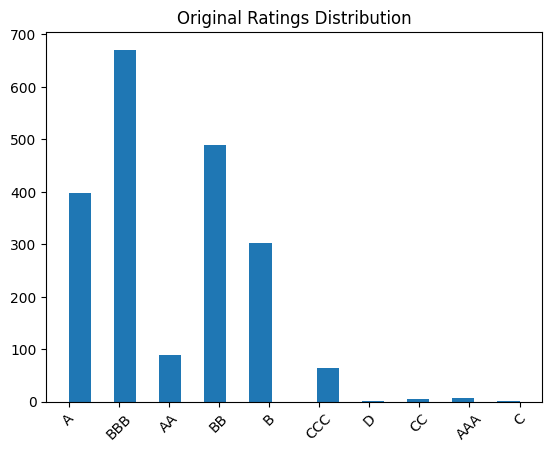

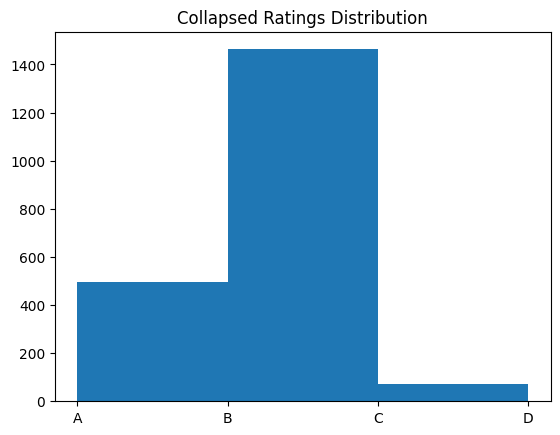

In [13]:
# Plot original ratings distribution
plt.hist(ratings['Rating'], bins=20)
plt.title('Original Ratings Distribution')
plt.xticks(rotation=45)
plt.show()

# Collapse ratings: AAA/AA/A -> A, BBB/BB/B -> B, CCC/CC/C -> C
ratings['Rating'] = ratings['Rating'].replace({
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
})

# Plot collapsed ratings distribution
plt.hist(ratings['Rating'], bins=3)
plt.title('Collapsed Ratings Distribution')
plt.show()

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

In [14]:
# Drop unnecessary columns
X = ratings.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])

# One-hot encode Sector
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

# Target variable
y = ratings['Rating']

# Display processed features
print("Processed features shape:", X.shape)
print("\nFirst 3 rows of processed features:")
display(X.head(3))

Processed features shape: (2029, 36)

First 3 rows of processed features:


,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False


4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

Accuracy: 0.704


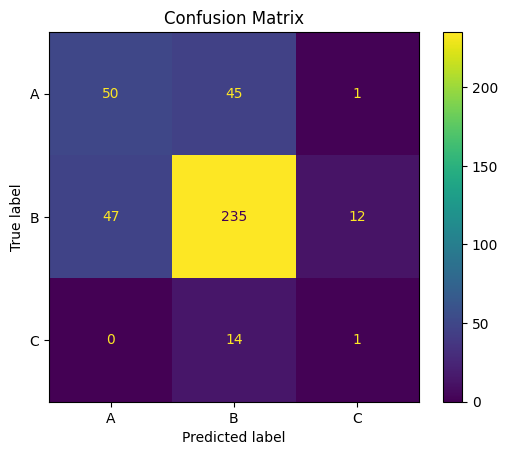

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree.fit(X_train, y_train)

# Predictions and evaluation
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

Accuracy with Rating Agency: 0.739


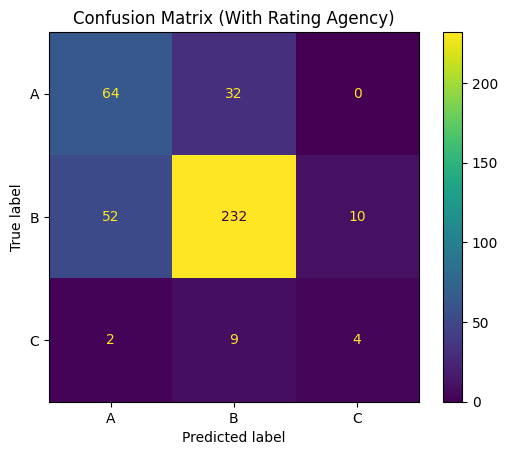

In [16]:
# Include Rating Agency as a feature
X_agency = ratings.drop(columns=['Rating', 'Date', 'Name', 'Symbol'])
X_agency = pd.get_dummies(X_agency, columns=['Sector', 'Rating Agency Name'], drop_first=True)

# Train-test split
X_train_agency, X_test_agency, y_train, y_test = train_test_split(X_agency, y, test_size=0.2, random_state=42)

# Train and evaluate
tree_agency = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_agency.fit(X_train_agency, y_train)
y_pred_agency = tree_agency.predict(X_test_agency)
accuracy_agency = accuracy_score(y_test, y_pred_agency)
print(f"Accuracy with Rating Agency: {accuracy_agency:.3f}")

# Confusion matrix
cm_agency = confusion_matrix(y_test, y_pred_agency, labels=['A', 'B', 'C'])
disp_agency = ConfusionMatrixDisplay(confusion_matrix=cm_agency, display_labels=['A', 'B', 'C'])
disp_agency.plot()
plt.title('Confusion Matrix (With Rating Agency)')
plt.show()